In [1]:
import numpy as np
#task1.0: зарегистрироваться на https://www.kaggle.com/

In [ ]:
# task1.1. Реализовать нейрон на базе пороговой функциии

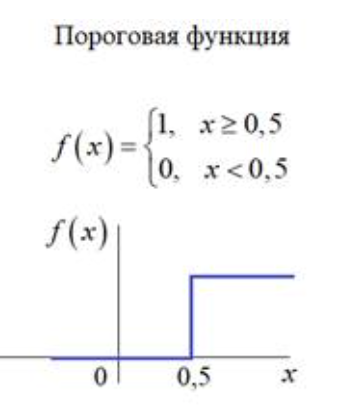

In [11]:

def porog_def(x):
    return 1 if x >= 0.5  else  0


class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Умножаем входы на веса, прибавляем порог, затем используем функцию активации
    total = np.dot(self.weights, inputs) + self.bias
    return porog_def(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))

1


In [ ]:
# task1.2. Реализовать нейрон на базе функции softsign

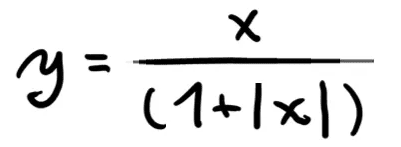

In [12]:

def softsign(x):
    return  x / (1 + abs (x))


class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Умножаем входы на веса, прибавляем порог, затем используем функцию активации
    total = np.dot(self.weights, inputs) + self.bias
    return softsign(total)


weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))

0.875


In [ ]:
# task1.3. Реализовать 3 слоя нейронов (по 2 нейрона в каждом) с использованием softsign

In [13]:

class OurNeuralNetwork:
  def __init__(self, weights = [0,0], bias = 1):
    self.weights = weights
    self.bias = bias

    # Используем класс Neuron из предыдущего раздела
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.h3 = Neuron(weights, bias)
    self.h4 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)
    out_h3 = self.h3.feedforward(np.array([out_h1, out_h2]))
    out_h4 = self.h4.feedforward(np.array([out_h1, out_h2]))
    out_o1 = self.o1.feedforward(np.array([out_h3, out_h4]))
    return out_o1

network = OurNeuralNetwork([0,1], 0 )
x = np.array([2, 3])
print(network.feedforward(x))

0.3


task1.4. Реализовать на базе модели определения пола выявление с другим нормированием (относительно среднего значения). Также добавьте альтернативную функцию активации


In [25]:
def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self, active_function =sigmoid , active_def_deriv = deriv_sigmoid , loss = mse_loss):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

    self.active_def = active_function
    self.active_def_deriv = active_def_deriv
    self.loss = loss


  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = self.active_def(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = self.active_def(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = self.active_def(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = self.active_def(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = self.active_def(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = self.active_def(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * self.active_def_deriv(sum_o1)
        d_ypred_d_w6 = h2 * self.active_def_deriv(sum_o1)
        d_ypred_d_b3 = self.active_def_deriv(sum_o1)

        d_ypred_d_h1 = self.w5 * self.active_def_deriv(sum_o1)
        d_ypred_d_h2 = self.w6 * self.active_def_deriv(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * self.active_def_deriv(sum_h1)
        d_h1_d_w2 = x[1] * self.active_def_deriv(sum_h1)
        d_h1_d_b1 = self.active_def_deriv(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * self.active_def_deriv(sum_h2)
        d_h2_d_w4 = x[1] * self.active_def_deriv(sum_h2)
        d_h2_d_b2 = self.active_def_deriv(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = self.loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951
print("Frank: %.3f" % network.feedforward(frank)) # 0.039

Epoch 0 loss: 0.232
Epoch 10 loss: 0.180
Epoch 20 loss: 0.140
Epoch 30 loss: 0.111
Epoch 40 loss: 0.089
Epoch 50 loss: 0.073
Epoch 60 loss: 0.061
Epoch 70 loss: 0.052
Epoch 80 loss: 0.045
Epoch 90 loss: 0.039
Epoch 100 loss: 0.035
Epoch 110 loss: 0.031
Epoch 120 loss: 0.028
Epoch 130 loss: 0.025
Epoch 140 loss: 0.023
Epoch 150 loss: 0.021
Epoch 160 loss: 0.020
Epoch 170 loss: 0.018
Epoch 180 loss: 0.017
Epoch 190 loss: 0.016
Epoch 200 loss: 0.015
Epoch 210 loss: 0.014
Epoch 220 loss: 0.013
Epoch 230 loss: 0.013
Epoch 240 loss: 0.012
Epoch 250 loss: 0.012
Epoch 260 loss: 0.011
Epoch 270 loss: 0.011
Epoch 280 loss: 0.010
Epoch 290 loss: 0.010
Epoch 300 loss: 0.009
Epoch 310 loss: 0.009
Epoch 320 loss: 0.009
Epoch 330 loss: 0.008
Epoch 340 loss: 0.008
Epoch 350 loss: 0.008
Epoch 360 loss: 0.008
Epoch 370 loss: 0.007
Epoch 380 loss: 0.007
Epoch 390 loss: 0.007
Epoch 400 loss: 0.007
Epoch 410 loss: 0.006
Epoch 420 loss: 0.006
Epoch 430 loss: 0.006
Epoch 440 loss: 0.006
Epoch 450 loss: 0.006

In [26]:
import numpy as np

def relu(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return max(0,x)

def deriv_relu(x):
  return 1 if x >= 1  else  0

def mean_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred)).mean()

# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork(relu, deriv_relu, mean_loss)
network.train(data, all_y_trues)

# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951
print("Frank: %.3f" % network.feedforward(frank)) # 0.039

Epoch 0 loss: 0.500
Epoch 10 loss: 0.500
Epoch 20 loss: 0.500
Epoch 30 loss: 0.500
Epoch 40 loss: 0.500
Epoch 50 loss: 0.500
Epoch 60 loss: 0.500
Epoch 70 loss: 0.500
Epoch 80 loss: 0.500
Epoch 90 loss: 0.500
Epoch 100 loss: 0.500
Epoch 110 loss: 0.500
Epoch 120 loss: 0.500
Epoch 130 loss: 0.500
Epoch 140 loss: 0.500
Epoch 150 loss: 0.500
Epoch 160 loss: 0.500
Epoch 170 loss: 0.500
Epoch 180 loss: 0.500
Epoch 190 loss: 0.500
Epoch 200 loss: 0.500
Epoch 210 loss: 0.500
Epoch 220 loss: 0.500
Epoch 230 loss: 0.500
Epoch 240 loss: 0.500
Epoch 250 loss: 0.500
Epoch 260 loss: 0.500
Epoch 270 loss: 0.500
Epoch 280 loss: 0.500
Epoch 290 loss: 0.500
Epoch 300 loss: 0.500
Epoch 310 loss: 0.500
Epoch 320 loss: 0.500
Epoch 330 loss: 0.500
Epoch 340 loss: 0.500
Epoch 350 loss: 0.500
Epoch 360 loss: 0.500
Epoch 370 loss: 0.500
Epoch 380 loss: 0.500
Epoch 390 loss: 0.500
Epoch 400 loss: 0.500
Epoch 410 loss: 0.500
Epoch 420 loss: 0.500
Epoch 430 loss: 0.500
Epoch 440 loss: 0.500
Epoch 450 loss: 0.500

In [29]:
import numpy as np

def tanh(x):
  return (2 / (1 + np.exp(-2 * x)))-1

def deriv_tanh(x):
    fx = tanh(x)
    return (1 - fx**2)

def mean_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred)).mean()


# Train our neural network!
network = OurNeuralNetwork(tanh, deriv_tanh, mean_loss)
network.train(data, all_y_trues)

# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951
print("Frank: %.3f" % network.feedforward(frank)) # 0.039

Epoch 0 loss: 0.651
Epoch 10 loss: 0.549
Epoch 20 loss: 0.536
Epoch 30 loss: 0.529
Epoch 40 loss: 0.526
Epoch 50 loss: 0.523
Epoch 60 loss: 0.521
Epoch 70 loss: 0.520
Epoch 80 loss: 0.518
Epoch 90 loss: 0.517
Epoch 100 loss: 0.516
Epoch 110 loss: 0.516
Epoch 120 loss: 0.515
Epoch 130 loss: 0.515
Epoch 140 loss: 0.514
Epoch 150 loss: 0.514
Epoch 160 loss: 0.513
Epoch 170 loss: 0.513
Epoch 180 loss: 0.512
Epoch 190 loss: 0.512
Epoch 200 loss: 0.512
Epoch 210 loss: 0.512
Epoch 220 loss: 0.511
Epoch 230 loss: 0.511
Epoch 240 loss: 0.511
Epoch 250 loss: 0.511
Epoch 260 loss: 0.511
Epoch 270 loss: 0.510
Epoch 280 loss: 0.510
Epoch 290 loss: 0.510
Epoch 300 loss: 0.510
Epoch 310 loss: 0.510
Epoch 320 loss: 0.510
Epoch 330 loss: 0.510
Epoch 340 loss: 0.509
Epoch 350 loss: 0.509
Epoch 360 loss: 0.509
Epoch 370 loss: 0.509
Epoch 380 loss: 0.509
Epoch 390 loss: 0.509
Epoch 400 loss: 0.509
Epoch 410 loss: 0.509
Epoch 420 loss: 0.509
Epoch 430 loss: 0.509
Epoch 440 loss: 0.509
Epoch 450 loss: 0.508

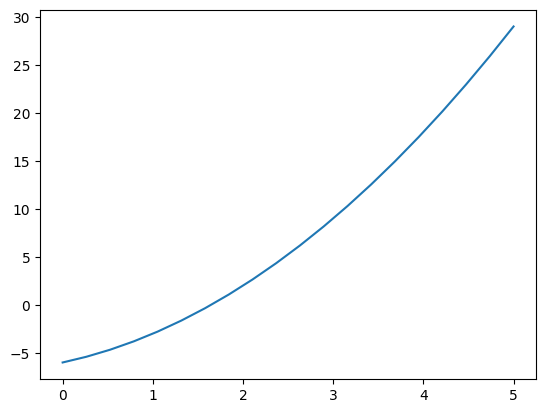

In [39]:
import matplotlib.pyplot as plt
# task1.5. Реализовать решение уровнения через градиентный спуск: x**2+2x-6

# Создаем арифметическую последовательность plot_x1
plot_x1 = np.linspace(0, 5, 20)
# Рассчитываем plot_y1 согласно нашему уравнению
plot_y1 = (plot_x1 ** 2 + 2* plot_x1 - 6)
# Возьмем соответствующее положение plot_x1 plot_y1 как координаты x, y точки, затем нарисуем кривую квадратного уравнения
plt.plot(plot_x1, plot_y1)
plt.show()

In [37]:
# Функция градиента
def dJ(x):
    return 2 * x + 2

 # Функция потерь
def J(x):
    return (x ** 2 + 2 * x - 6)

x = 6
 # Записываем точку каждого падения градиента
history_x=[x]
i_iter=0.1
 # Скорость обучения
learn_rate = 0.1
 # Выполнить градиентную итерацию
while i_iter < 1e4:
    i_iter += 0.1
    dj = dJ(x)
    last_x = x
    x =x - learn_rate * dj
    history_x.append(x)

         # Если итерация достигнута точно, расчет завершен
    if abs(J(x)-J(last_x))<0.0000000001 :
        break

history_y = J(np.array(history_x))
print(f'Координата x в минимуме параболы равна {round(x, 1)}')

Координата x в минимуме параболы равна -1.0


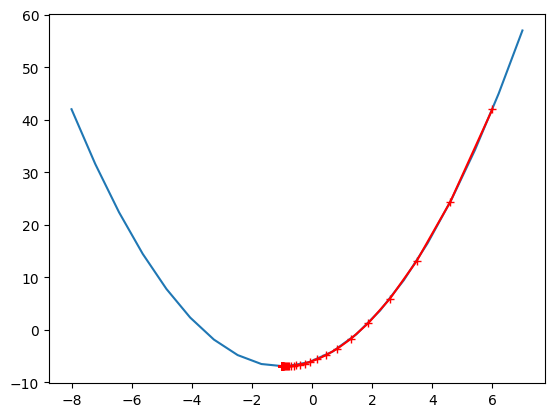

In [38]:
plt.plot(plot_x1, plot_y1)
plt.plot(history_x, history_y,color='r', marker='+')

In [ ]:

# task1.6. (дополнительно) Реализовать решение уровнения через градиентный спуск: x**3+2x**2-6x-1

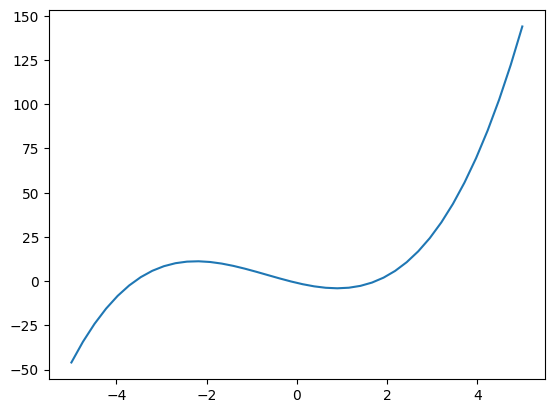

In [69]:
# Создаем арифметическую последовательность plot_x2
plot_x2 = np.linspace(-5, 5, 40)
# Рассчитываем plot_y2 согласно нашему уравнению
plot_y2 = (plot_x2 ** 3 + 2 * plot_x2 ** 2 -  6 * plot_x2 - 1)
# Возьмем соответствующее положение plot_x2 plot_y2 как координаты x, y точки, затем нарисуем кривую уравнения
plt.plot(plot_x2, plot_y2)
plt.show()

In [80]:
# Функция градиента
def dJ3(x):
    return  3 * x ** 2 + 4  * x  - 6

 # Функция потерь
def J3(x):
    return x ** 3 + 2 * x ** 2 -  6 * x - 1



x1 = - 2
x2 = - 1
x3 = 1
 # Записываем точку каждого падения градиента
history_x1=[x1]
history_x2=[x2]
history_x3=[x3]
i_iter=0.06
 # Скорость обучения
learn_rate = 0.1
 # Выполнить градиентную итерацию
while i_iter < 1e4:

    i_iter += 0.002
    dj1 = dJ3(x1)
    dj2 = dJ3(x2)
    dj3 = dJ3(x3)

    last_x1 = x1
    last_x2 = x2
    last_x3 = x3

    x1 = x1 - learn_rate * dj1
    x2 = x2 - learn_rate * dj2
    x3 = x3 - learn_rate * dj3

    history_x1.append(x1)
    history_x2.append(x2)
    history_x3.append(x3)

         # Если итерация достигнута точно, расчет завершен
    if abs(J3(x1)-J(last_x1))<0.0000000001 :
        break
    if abs(J3(x2)-J(last_x2))<0.0000000001 :
        break
    if abs(J3(x3)-J(last_x3))<0.0000000001 :
        break

history_y1 = J(np.array(history_x1))
history_y2 = J(np.array(history_x2))
history_y3 = J(np.array(history_x3))

print(f'Корни кубического уровня: х1 = {round(x1, 1)}, х2 = {round(x2, 1)}, х3 = {round(x3, 1)}')

Корни кубического уровня: х1 = 0.5, х2 = 0.9, х3 = 0.9


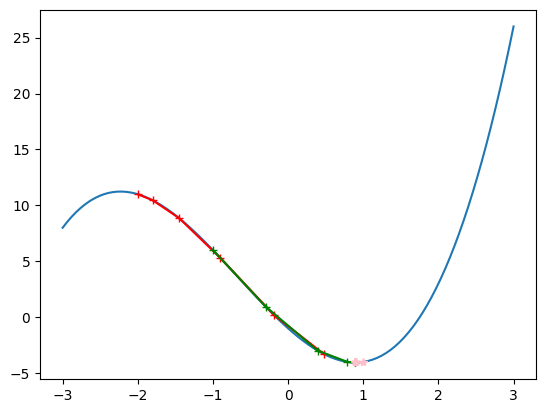

In [81]:
# Создаем арифметическую последовательность plot_x2
plot_x2 = np.linspace(-3, 3, 100)
# Рассчитываем plot_y2 согласно нашему уравнению
plot_y2 = (plot_x2 ** 3 + 2 * plot_x2 ** 2 -  6 * plot_x2 - 1)
# Возьмем соответствующее положение plot_x2 plot_y2 как координаты x, y точки, затем нарисуем кривую уравнения

plt.plot(plot_x2,plot_y2)
plt.plot(history_x1,history_y1,color='r',marker='+')
plt.plot(history_x2,history_y2,color='g',marker='+')
plt.plot(history_x3,history_y3,color='pink',marker='*')
